# First look at datasets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#import self-made functions
%run '/Users/mariekececilia/Documents/master_thesis_code/methods.ipynb'

## Load Data

In [3]:
gexp_g, flux_g = load_gerosa()
gexp_i, flux_i = load_ishii()

## Sizes, datatypes and missing values

Check sizes and comparability:

In [4]:
print('Gerosa')
print(gexp_g.shape)
print(flux_g.shape)
print('Equal index:', (gexp_g.index == flux_g.index).sum())
print('\nIshii')
print(gexp_i.shape)
print(flux_i.shape)
print('Equal index:', (gexp_i.index == flux_i.index).sum())

Gerosa
(8, 4150)
(8, 40)
Equal index: 8

Ishii
(29, 79)
(29, 46)
Equal index: 29


--> There are many more features than samples. There are as many samples in the gene expression data as in the flux data, and they are all given in the same order.

Check that datatypes are loaded as expected:

In [5]:
print('Non-numeric entries:')
print(gexp_g.dtypes[gexp_g.dtypes != 'float64'])
print(flux_g.dtypes[flux_g.dtypes != 'float64'])
print(gexp_i.dtypes[gexp_i.dtypes != 'float64'])
print(flux_i.dtypes[flux_i.dtypes != 'float64'])

Non-numeric entries:
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)
Series([], dtype: object)


--> all entries are numeric, but they could still be NaN. 

Check whether missing values (NaN) are present:

In [6]:
print(gexp_g.isna().sum().sum())
print(flux_g.isna().sum().sum())
print(gexp_i.isna().sum().sum())
print(flux_i.isna().sum().sum())

0
0
0
0


--> There are no missing values in the data.

## Size of intersection

In [7]:
print('Common genes:', len(get_intersection(gexp_g, gexp_i)))
print('Common reactions:', len(get_intersection(flux_i, flux_g)))

Common genes: 79
Common reactions: 32


--> all genes in Ishii are present in Gerosa (because there are 79 genes in Ishii)

## Duplicates?

### Rows: samples

In [8]:
print('Duplicated samples in transcriptomics:')
print('Gerosa:')
display(gexp_g[gexp_g.duplicated(keep = False)].sort_values(by = gexp_g.columns[1]))
print('Ishii:')
display(gexp_i[gexp_i.duplicated(keep = False)].sort_values(by = gexp_i.columns[1]))

print('Duplicated samples in fluxomics:')
print('Gerosa:')
display(flux_g[flux_g.duplicated(keep = False)].sort_values(by = flux_g.columns[1]))
print('Ishii:')
display(flux_i[flux_i.duplicated(keep = False)].sort_values(by = flux_i.columns[1]))

Duplicated samples in transcriptomics:
Gerosa:


,b0002,b0003,b0004,b0005,b0006,b0007,b0008,b0009,b0010,b0011,...,b4580,b4581,b4593,b4594,b4659,b4660,b4661,b4693,b4694,b4696


Ishii:


,b0008,b0114,b0115,b0116,b0118,b0333,b0474,b0688,b0720,b0721,...,b4015,b4025,b4069,b4090,b4122,b4151,b4152,b4153,b4154,b4232


Duplicated samples in fluxomics:
Gerosa:


,R_EX_ac_e,R_EX_fru_e,R_EX_gal_e,R_EX_glc_e,R_EX_glyc_e,R_EX_glcn_e,R_EX_pyr_e,R_EX_succ_e,R_EX_fum_e,R_EX_lac_D_e,...,R_CS,R_ACONTa,R_ACONTb,R_ICDHyr,R_AKGDH,R_SUCOAS,R_SUCDi,R_FUM,R_ICL,R_MALS


Ishii:


,R_GLCptspp,R_PGI,R_PFK,R_FBA,R_TPI,R_PGK,R_GAPD,R_ENO,R_PGM,R_PYK,...,R_ALCD2x,R_EX_glc_e,R_EX_o2_e,R_EX_co2_e,R_EX_etoh_e,R_EX_ac_e,R_EX_lac_D_e,R_EX_succ_e,R_EX_pyr_e,R_EX_for_e


--> No samples are duplicates of one another. 

### Columns: features or targets

In [9]:
print('Duplicated genes and their expression levels:')
print('Gerosa:')
display(gexp_g.T[gexp_g.T.duplicated(keep = False)].sort_values(by = gexp_g.T.columns[0]))
print('Ishii:')
display(gexp_i.T[gexp_i.T.duplicated(keep = False)].sort_values(by = gexp_i.T.columns[0]))

#Consider absolute values for fluxes
print('Duplicated reactions and their fluxes:')
print('Gerosa:')
display(flux_g.T[flux_g.abs().T.duplicated(keep = False)].sort_values(by = flux_g.T.columns[0]))
print('Ishii:')
display(flux_i.T[flux_i.abs().T.duplicated(keep = False)].sort_values(by = flux_i.T.columns[0]))

Duplicated genes and their expression levels:
Gerosa:


,Acetate,Fructose,Galactose,Glucose,Glycerol,Gluconate,Pyruvate,Succinate
b2088,0.594961,0.631862,1.160709,1.197898,1.120681,0.993425,0.802093,0.972243
b0540,0.594961,0.631862,1.160709,1.197898,1.120681,0.993425,0.802093,0.972243
b0373,0.594961,0.631862,1.160709,1.197898,1.120681,0.993425,0.802093,0.972243
b1027,0.594961,0.631862,1.160709,1.197898,1.120681,0.993425,0.802093,0.972243
b0298,0.594961,0.631862,1.160709,1.197898,1.120681,0.993425,0.802093,0.972243
b1404,0.680694,0.841097,0.820167,1.388808,1.136949,1.069269,0.464329,1.070448
b4284,0.680694,0.841097,0.820167,1.388808,1.136949,1.069269,0.464329,1.070448
b0256,0.680694,0.841097,0.820167,1.388808,1.136949,1.069269,0.464329,1.070448
b0988,1.125086,0.999305,1.000691,0.940218,1.005713,1.034540,1.375829,0.821619
b1893,1.125086,0.999305,1.000691,0.940218,1.005713,1.034540,1.375829,0.821619


Ishii:


,WT_0.2h-1,WT_0.1h-1,WT_0.4h-1,WT_0.5h-1,WT_0.7h-1,galM,glk,pgm,pgi,pfkA,...,zwf,pgl,gnd,rpe,rpiA,rpiB,tktA,tktB,talA,talB


Duplicated reactions and their fluxes:
Gerosa:


,Acetate,Fructose,Galactose,Glucose,Glycerol,Gluconate,Pyruvate,Succinate
R_SUCOAS,-4.267163,-3.874895e+00,-0.236073,-2.138073e+00,-1.840459e+00,-1.823583e-01,-7.415655e+00,-2.351983
R_ENO,-2.736594,1.259852e+01,3.041527,1.455770e+01,7.258765e+00,5.873380e+00,-1.789142e+00,-4.273854
R_GAPD,-2.263870,1.346463e+01,3.308524,1.571039e+01,8.012883e+00,6.894586e+00,-1.129306e+00,-3.415146
R_EDD,0.821594,8.328070e-10,0.172972,1.086991e+00,1.458035e-02,5.818961e+00,2.671420e-09,0.655464
R_EDA,0.821594,8.328070e-10,0.172972,1.086991e+00,1.458035e-02,5.818961e+00,2.671420e-09,0.655464
R_TALA,0.839147,1.983808e+00,0.132210,8.202017e-01,1.080746e+00,3.887739e-01,2.477439e-01,1.563851
R_TKT1,0.839147,1.983808e+00,0.132210,8.202017e-01,1.080746e+00,3.887739e-01,2.477439e-01,1.563851
R_PGK,2.263870,-1.346463e+01,-3.308524,-1.571039e+01,-8.012883e+00,-6.894586e+00,1.129306e+00,3.415146
R_PGM,2.736594,-1.259852e+01,-3.041527,-1.455770e+01,-7.258765e+00,-5.873380e+00,1.789142e+00,4.273854
R_PGL,3.408313,6.171283e+00,0.591654,3.919275e+00,3.426090e+00,0.000000e+00,8.768016e-01,5.563286


Ishii:


,WT_0.2h-1,WT_0.1h-1,WT_0.4h-1,WT_0.5h-1,WT_0.7h-1,galM,glk,pgm,pgi,pfkA,...,zwf,pgl,gnd,rpe,rpiA,rpiB,tktA,tktB,talA,talB
R_PGK,-5.03960,-2.2378,-8.3325,-11.4699,-22.6780,-5.1072,-5.5578,-5.2938,-3.2760,-4.7056,...,-5.7558,-5.8128,-5.3144,-6.5703,-4.9926,-7.0135,-7.6779,-5.1975,-4.872,-5.1450
R_PGM,-4.73781,-2.1038,-7.7265,-10.7406,-21.6108,-4.8336,-5.2438,-5.0184,-2.9757,-4.4064,...,-5.4378,-5.4432,-5.0516,-6.2799,-4.7064,-6.7230,-7.3636,-4.9005,-4.564,-4.8510
R_EX_glc_e,-2.93000,-1.3400,-5.0500,-6.6300,-13.3400,-3.0400,-3.1400,-3.0600,-2.7300,-2.7200,...,-3.1800,-3.3600,-2.9200,-3.6300,-3.1800,-4.1500,-4.4900,-2.9700,-2.800,-2.9400
R_SUCOAS,-1.83125,-0.6432,-3.0300,-4.1769,-11.0722,-1.6112,-2.6062,-2.2644,-0.9009,-1.7408,...,-2.1624,-2.1840,-2.4820,-3.1581,-2.2896,-3.9425,-5.5227,-2.4948,-2.100,-2.3814
R_ALCD2x,-0.00293,-0.0000,-0.0000,-0.1326,-0.1334,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0726,-0.0000,-0.0000,-0.0000,-0.0000,-0.000,-0.0000
R_ACALD,-0.00293,-0.0000,-0.0000,-0.1326,-0.1334,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0726,-0.0000,-0.0000,-0.0000,-0.0000,-0.000,-0.0000
R_EX_lac_D_e,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
R_PTAr,0.00000,0.0000,0.0000,0.4641,1.8676,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
R_LDH_D,-0.00000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.000,-0.0000
R_ACKr,-0.00000,-0.0000,-0.0000,-0.4641,-1.8676,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.000,-0.0000


--> In Gerosa, there are both features and reactions that are equal to one another. In Ishii, there are only reactions that are equal to one another. 

### Conflicts?

In [10]:
for gene in gexp_g.T[gexp_g.T.duplicated(keep = False)].T.columns:
    if gene in gexp_i.columns:
        print(gene)
print('completed')

completed


--> None of the duplicated genes in Gerosa are present in the ishii data. There are no conflicts there and all those extra genes can be removed.

In [11]:
for r in flux_g.T[flux_g.T.duplicated(keep = False)].T.columns:
    if r in flux_i.columns:
        if r not in flux_i.T[flux_i.T.duplicated(keep = False)].T.columns:
            print(r, ': duplicate only in Gerosa')

for r in flux_i.T[flux_i.T.duplicated(keep = False)].T.columns:
    if r in flux_g.columns:
        if r not in flux_g.T[flux_g.T.duplicated(keep = False)].T.columns:
            print(r, ': duplicate only in Ishii')

R_G6PDH2r : duplicate only in Gerosa
R_FBA : duplicate only in Ishii
R_TPI : duplicate only in Ishii
R_GND : duplicate only in Ishii
R_SUCDi : duplicate only in Ishii
R_FUM : duplicate only in Ishii
R_EX_lac_D_e : duplicate only in Ishii


--> There are some conflicts of which of the reactions in the intersection of the data that are duplicates. Keep this in mind when cleaning the data. 

## Zeros

 Even though there are no NaNs, there could still be many zeros. Check occurence of zero:

In [12]:
print('Gerosa')
print((gexp_g == 0).sum().sum())
print((flux_g == 0).sum().sum())
print('\nIshii')
print((gexp_i == 0).sum().sum())
print((flux_i == 0).sum().sum())

Gerosa
0
59

Ishii
0
351


--> There is registered an expression level for all genes in all conditions, even knocked-out genes. There is not registered a flux for all reactions in all conditions, however. Investigate which reactions this concern and to what extent:

In [13]:
#Show zero count for columns with at least one zero
print('0s in Gerosa (total samples = %s)' %flux_g.shape[0])
count_g = flux_g.apply(lambda e: (e == 0).sum())
print(count_g[count_g > 0].sort_values())
print('\n0s in Ishii (total samples = %s)' %flux_i.shape[0])
count_i = flux_i.apply(lambda e: (e == 0).sum())
print(count_i[count_i > 0].sort_values())

0s in Gerosa (total samples = 8)
R_EX_fum_e      1
R_G6PDH2r       1
R_PGL           1
R_EX_fru_e      7
R_EX_gal_e      7
R_EX_glc_e      7
R_EX_glyc_e     7
R_EX_glcn_e     7
R_EX_pyr_e      7
R_EX_succ_e     7
R_EX_lac_D_e    7
dtype: int64

0s in Ishii (total samples = 29)
R_PGI            1
R_RPE            1
R_G6PDH2r        2
R_PGL            2
R_GND            2
R_ICL            6
R_MALS           6
R_PPC            9
R_TKT2          10
R_ME2           20
R_EX_etoh_e     24
R_ALCD2x        25
R_ACALD         25
R_EX_for_e      25
R_EX_ac_e       26
R_PTAr          27
R_EX_succ_e     27
R_ACKr          27
R_EX_pyr_e      28
R_EX_lac_D_e    29
R_LDH_D         29
dtype: int64


--> Some reactions are mostly 0 and should be removed (R_EX_lac_D_e and R_LDH_D are always 0 in Ishii, in fact). Many of these are exchange reactions, which especially makes sense in the Gerosa data where there is only one sole carbon source for each observation. 

### Sole-carbon sources in Gerosa

In [14]:
#The carbon sources:
sorted(flux_g.index)

['Acetate',
 'Fructose',
 'Galactose',
 'Gluconate',
 'Glucose',
 'Glycerol',
 'Pyruvate',
 'Succinate']

In [15]:
#Reactions that have zero flux in all but one sample
active_once = (count_g[count_g == 7]).index.tolist()

#Find which sample the flux is non-zero in and what the value is:
for reaction in sorted(active_once):
    sample = flux_g.index[(flux_g != 0)[reaction]].tolist()
    print('%s\t%s\t%s' % (sample, 
                         reaction,
                         flux_g.loc[sample, reaction].values)
         )

['Fructose']	R_EX_fru_e	[-8.328]
['Galactose']	R_EX_gal_e	[-1.969]
['Glucose']	R_EX_glc_e	[-9.654]
['Gluconate']	R_EX_glcn_e	[-7.28392319]
['Glycerol']	R_EX_glyc_e	[-10.14]
['Pyruvate']	R_EX_lac_D_e	[1.15701005]
['Pyruvate']	R_EX_pyr_e	[-26.714]
['Succinate']	R_EX_succ_e	[-15.902]


--> The carbon sources are only taken up when they are expected to. In addition, lactose is only exported when pyruvate is the source. 
However, acateate is not in the list and its exchange is thus active in more samples than when acetate is the carbon source.

Check where acetate is being taken up:

In [16]:
flux_g['R_EX_ac_e'][flux_g['R_EX_ac_e']<0]

Acetate     -1.358400e+01
Galactose   -1.968940e-08
Name: R_EX_ac_e, dtype: float64

The flux in the other condition is at a rate of many order of magnitude less; it is actually rounded off to zero when including up to 7 decimals.

In [17]:
import numpy as np
np.round(flux_g['R_EX_ac_e'], 7)

Acetate     -13.584000
Fructose      3.328660
Galactose    -0.000000
Glucose       6.827019
Glycerol      0.597000
Gluconate     5.003982
Pyruvate     11.913910
Succinate     3.320974
Name: R_EX_ac_e, dtype: float64

### Knock-outs in ishii

In [18]:
[gene_name_dict, b_number_dict] = get_id_dicts(gexp_g)

Keep in mind that:
* The conversion table used was for a differnt K-12 substrain: MG1655
* only one of these duplicated b numbers were kept:
     common_name b_number
915       yhiS_2    b3504
978         yhiS    b3504
2072         crl    b0240
3091       crl_1    b0240
* 'Following b-numbers had no match in the conversion table and are mapped to 'unsure' names:'
	- b4104 -> unsure_1
	- b4339 -> unsure_2
	- b4659 -> unsure_3
	- b4693 -> unsure_4
	- b4694 -> unsure_5


In [19]:
#extract KO from the rows
ko_samples = gexp_i.index.drop(['WT_0.2h-1', 'WT_0.1h-1', 'WT_0.4h-1', 'WT_0.5h-1', 'WT_0.7h-1']).tolist()

#find the KO-genes in the columns
ko_genes = []
for gene in ko_samples:
    if gene in gene_name_dict.keys(): 
        if gene_name_dict[gene] in gexp_i.columns:
            ko_genes.append(gene_name_dict[gene])
ko_df = gexp_i.loc[ko_samples, ko_genes].rename(columns = b_number_dict).sort_index(axis = 0).sort_index(axis = 1)
ko_df.index.name = 'Knock-out sample'
ko_df.columns.name = 'Gene'

#color code entries
def color_low(val):
    if val < 0.0001:
        color = 'red'
    elif val < 0.001:
        color = 'orange'
    elif val < 0.01:
        color = 'black'
    else: 
        color = 'green'
    return 'color: %s' % color

print("""
Interval the expression lies within:
Green:  [0.01, ->)
Black:  [0.001, 0.01)
Orange: [0.00001, 0.001)
Red:    (<- , 0.0001)
""")

s = ko_df.style.applymap(color_low).format(precision = 4)

display(s)


Interval the expression lies within:
Green:  [0.01, ->)
Black:  [0.001, 0.01)
Orange: [0.00001, 0.001)
Red:    (<- , 0.0001)



Gene,fbaB,fbp,galM,glk,gnd,gpmA,pfkA,pfkB,pgi,pgl,pgm,ppsA,pykA,pykF,rpe,rpiA,rpiB,talA,talB,tktA,tktB,zwf
Knock-out sample,,,,,,,,,,,,,,,,,,,,,,
fbaB,0.0000,0.0097,0.0117,0.0077,0.0294,0.0646,0.0056,0.0100,0.0332,0.0158,0.0234,0.0445,0.0217,0.0280,0.0091,0.0095,0.0019,0.0283,0.0258,0.0198,0.0283,0.0120
fbp,0.0545,0.0000,0.0085,0.0065,0.0329,0.0463,0.0054,0.0134,0.0202,0.0092,0.0171,0.0472,0.0171,0.0168,0.0093,0.0082,0.0058,0.0245,0.0249,0.0189,0.0217,0.0113
galM,0.0421,0.0102,0.0000,0.0079,0.0256,0.0401,0.0055,0.0097,0.0276,0.0086,0.0192,0.0496,0.0169,0.0227,0.0071,0.0086,0.0021,0.0142,0.0303,0.0236,0.0127,0.0112
gapC,0.0280,0.0130,0.0116,0.0088,0.0278,0.0523,0.0051,0.0027,0.0254,0.0078,0.0212,0.0441,0.0232,0.0189,0.0074,0.0086,0.0025,0.0091,0.0336,0.0238,0.0084,0.0111
glk,0.0401,0.0116,0.0111,0.0000,0.0267,0.0532,0.0068,0.0040,0.0189,0.0062,0.0200,0.0530,0.0192,0.0130,0.0103,0.0092,0.0031,0.0162,0.0260,0.0245,0.0122,0.0125
gnd,0.0559,0.0127,0.0136,0.0102,0.0000,0.0365,0.0072,0.0090,0.0361,0.0108,0.0215,0.0552,0.0204,0.0185,0.0071,0.0066,0.0027,0.0227,0.0321,0.0256,0.0181,0.0131
gpmA,0.0637,0.0109,0.0104,0.0072,0.0392,0.0000,0.0058,0.0082,0.0229,0.0114,0.0170,0.0465,0.0179,0.0194,0.0102,0.0114,0.0032,0.0280,0.0436,0.0265,0.0225,0.0142
gpmB,0.0496,0.0096,0.0077,0.0075,0.0314,0.0447,0.0043,0.0103,0.0249,0.0094,0.0161,0.0492,0.0167,0.0232,0.0087,0.0095,0.0018,0.0165,0.0314,0.0289,0.0128,0.0096
pfkA,0.0688,0.0104,0.0125,0.0095,0.0283,0.0574,0.0000,0.1547,0.0309,0.0254,0.0289,0.0439,0.0325,0.0358,0.0111,0.0111,0.0109,0.0263,0.0294,0.0196,0.0263,0.0201


--> When knocked out, all genes are expressed below 0.001. All but one is even expressed below 0.0001, while when the given gene is not a KO, it is always expressed above 0.001, and often above 0.01. So the order of magnitude is less when knocked-out -> they are indeed inactive.

## Reversible reactions

In [20]:
print('Reactions with only negative fluxes:')
print('Gerosa:', sorted(flux_g.columns[((flux_g.min() < 0) & (flux_g.max() <= 0))]))
print('Ishii:', sorted(flux_i.columns[((flux_i.min() < 0) & (flux_i.max() <= 0))]))

print('\nReactions spanning 0:')
print('Gerosa:', sorted(flux_g.columns[((flux_g.min() < 0) & (flux_g.max() > 0))]))
print('Ishii:', sorted(flux_i.columns[((flux_i.min() < 0) & (flux_i.max() > 0))]))

Reactions with only negative fluxes:
Gerosa: ['R_EX_fru_e', 'R_EX_gal_e', 'R_EX_glc_e', 'R_EX_glcn_e', 'R_EX_glyc_e', 'R_EX_pyr_e', 'R_EX_succ_e', 'R_RPI', 'R_SUCOAS']
Ishii: ['R_ACALD', 'R_ACKr', 'R_ALCD2x', 'R_EX_glc_e', 'R_EX_o2_e', 'R_PGK', 'R_PGM', 'R_RPI', 'R_SUCOAS']

Reactions spanning 0:
Gerosa: ['R_ENO', 'R_EX_ac_e', 'R_FBA', 'R_GAPD', 'R_PGI', 'R_PGK', 'R_PGM', 'R_PPCK', 'R_TPI']
Ishii: ['R_RPE', 'R_TALA', 'R_TKT1', 'R_TKT2']


## Ranges in data

Check the range of the gene expression to see whether the columns are on different scales:

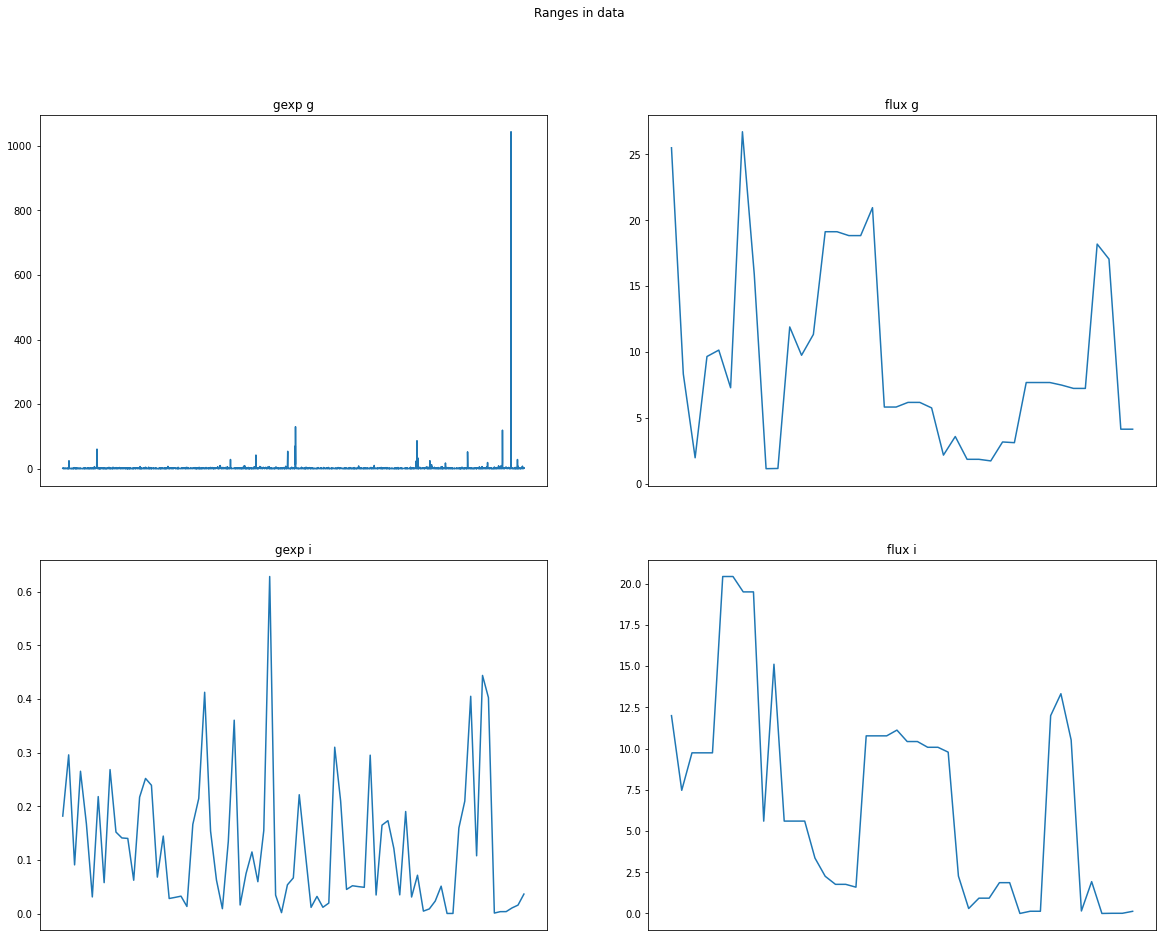

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

(gexp_g.max()-gexp_g.min()).plot(ax = ax1)
ax1.set_title('gexp g')

(flux_g.max()-flux_g.min()).plot(ax = ax2)
ax2.set_title('flux g')

(gexp_i.max()-gexp_i.min()).plot(ax = ax3)
ax3.set_title('gexp i')

(flux_i.max()-flux_i.min()).plot(ax = ax4)
ax4.set_title('flux i')

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])

plt.suptitle('Ranges in data')
plt.show()
plt.close()